In [1]:
import gzip, time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle

def is_valid(bc):
    return (bc[4:6]=='TG'
            and bc[10:12]=='CA' 
            and bc[16:18]=='AC' 
            and bc[22:24]=='GA' 
            and bc[28:30]=='GT'
            and bc[34:36]=='AG')

def in_filtered_list(cell_bc, filtered_cell_barcodes):
    num_Ns = sum([c=='N' for c in cell_bc])
    if num_Ns > 1: return False
    elif num_Ns == 1: return np.any([cell_bc.replace('N',c) in filtered_cell_barcodes for c in 'ACTG'])
    else: return cell_bc in filtered_cell_barcodes

In [2]:
larry_prefix = 'GTTGCTAGGAGAGACCATATG'
N_READS = 10
N_UMIS = 3
N_HAMMING = 3

output_prefix = 'Larry_day-12'

sample_paths = {
    'Larry_day-12': {
        'filtered_cell_barcodes_path':'/mnt/yiming/nfs_share/larry/Larry-D12/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',
        'larry_barcode_fastq_paths':[
            '/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz',
            '/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JYVHLT4_L8_{}.fq.gz', 
            '/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22KGWKLT4_L6_{}.fq.gz'
        ]
    }
}

In [3]:
counts = {}

for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open(fastq_path.format('R1'))
        R2 = gzip.open(fastq_path.format('R2'))
        counter = 0
        start_time = time.time()
        while True:
            counter += 1
            if counter % 1000000 == 0: print(fastq_path+ ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '': break
            if r2_line[0] in '@+': continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16]+'-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) and in_filtered_list(cell_bc, filtered_cell_barcodes):
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1

/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz: Processed 1000000 lines in 18.16242742538452 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz: Processed 2000000 lines in 36.32347059249878 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz: Processed 3000000 lines in 54.53359532356262 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz: Processed 4000000 lines in 73.01703310012817 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz: Processed 5000000 lines in 91.34905076026917 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_{}.fq.gz: Processed 6000000 lines in 109.73215389251709 seconds
/mnt/yiming/nfs_share/larry/barcode-pre

KeyboardInterrupt: 

In [30]:
counts

{('Larry_day-0',
  'GNAGATGTCCGCACGA-1',
  'TCCGGGAT',
  'TAAATGAGTGCAACCTACTCACGAAAGAGTTTTAAGAATA'): 1,
 ('Larry_day-0',
  'GNAATGCAGGATACAT-1',
  'TGGCCGGT',
  'ATGGTGCAAACAACTAACGAAAGATATCGTATTTAGATTT'): 1,
 ('Larry_day-0',
  'TNAATCGCAAGAATGT-1',
  'TCCGTGGC',
  'CGCCTGAATTCAGCGAACTGCCGAAAGAGTTAACAGTCAG'): 1,
 ('Larry_day-0',
  'CNTCTCCGTACGGATG-1',
  'CATTACTG',
  'TCATTGTAAGCAAACGACGGACGACCAAGTACCTAGGGAA'): 1,
 ('Larry_day-0',
  'CNCTCAGGTTGGGTTT-1',
  'GCAAAATA',
  'CATCTGCCTACACACTACTGCCGACAACGTCTCAAGTCAA'): 1,
 ('Larry_day-0',
  'CNACAGCTCGAAGGAC-1',
  'AGTCGATA',
  'TAGTTGCAGCCACGACACAAGAGAGGATGTTACCAGAGCA'): 1,
 ('Larry_day-0',
  'TNGCACTGTACTGCGC-1',
  'GAAGAAGT',
  'GCAATGGGTGCATGCAACACCGGACTCTGTCCCTAGCGGA'): 1,
 ('Larry_day-0',
  'CNGTGAAGTTGTTTGG-1',
  'AAGACTGA',
  'AATGTGGCACCATTCAACGAGCGATGTAGTATCCAGACTT'): 1,
 ('Larry_day-0',
  'TNGGGACTCGATTGGT-1',
  'TGAACTTG',
  'CAGATGCCAGCACTCCACGACGGACTCGGTACCCAGGCCG'): 1,
 ('Larry_day-0',
  'TNCCAATTCAACTGGT-1',
  'GATAATAG',


In [3]:
# Load the object from the file
with open('/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/Larry_day12_barcode_v3.pkl', 'rb') as file:
    counts = pickle.load(file)

In [4]:
counts

{('Larry_day-12',
  'TNGCATTTCTCATTAC-1',
  'GCAACTTT',
  'GCGCTGCCCGCAAGACACACGCGACCCAGTACCAAGTAAA'): 1,
 ('Larry_day-12',
  'ANGGTTAGTAAGGCCA-1',
  'ATGAGTAA',
  'CATGTGGCACCATTCCACAAGCGATGTAGTATCCAGCTTT'): 1,
 ('Larry_day-12',
  'GNCATTCCAACCACAT-1',
  'CGTTTGCA',
  'GAACTGAGAACAACACACTATAGAACGTGTAACAAGAGAG'): 1,
 ('Larry_day-12',
  'TNCGCTCAGGATATGT-1',
  'TTCTAGGG',
  'CCCCTGCCAACATCCCACAAGCGAACGAGTAAAAAGGTTT'): 1,
 ('Larry_day-12',
  'GNAGTAACATGTCGTA-1',
  'CCACTCGT',
  'AATGTGGCACCATTCAACGAGCGATGTAGTATCCAGACTT'): 1,
 ('Larry_day-12',
  'CNAACTTGTTTCACAG-1',
  'AAAACCCT',
  'AGAATGACCCCACGGAACGTGCGAGTAAGTTGATAGGGCT'): 1,
 ('Larry_day-12',
  'GNTGAGGGTCTACAAC-1',
  'AGCCAAGC',
  'ATCGTGATGTCACCAAACACACGACGTAGTAAAAAGATGC'): 1,
 ('Larry_day-12',
  'TNGAGTGTCGTGGGAA-1',
  'ACCTTGTA',
  'CGCCTGAATTCAGCGAACTGCCGAAAGAGTTAACAGTCAG'): 1,
 ('Larry_day-12',
  'GNTCCCTGTAATGCTC-1',
  'CGGTTGCT',
  'TTACTGTGATCACTTGACGGGCGAGCCGGTCAACAGCGGA'): 1,
 ('Larry_day-12',
  'CNGGTCTAGATACTGA-1',
  'C

In [5]:
len(counts)

19945383

In [14]:
N_READS = 10
N_UMIS = 3
N_HAMMING = 3

Retaining 474831 out of 19945383 (Sample,Cell-BC,UMI,GFP-BC) combinations


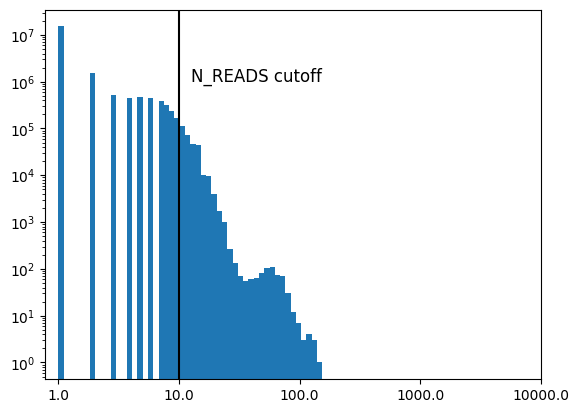

In [15]:
num_reads = [v for k,v in counts.items()]
plt.hist(np.log(num_reads)/np.log(10), bins=50)
plt.axvline(np.log(N_READS)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(N_READS)/np.log(10)*1.1,10**6,'N_READS cutoff', fontsize=12)
plt.yscale('log')

counts_filtered = {k:v for k,v in counts.items() if v >= N_READS}
print('Retaining '+repr(len(counts_filtered))+ ' out of '+repr(len(counts))+' (Sample,Cell-BC,UMI,GFP-BC) combinations')

In [16]:
def hamming(bc1,bc2): return np.sum([x1 != x2 for x1,x2 in zip(bc1,bc2)])

all_gfp_bcs = sorted(set([k[3] for k in counts_filtered]))
good_gfp_bcs = []
bc_map = {}
for i,bc1 in enumerate(all_gfp_bcs):
    if i > 0 and i % 500 == 0: print('Mapped '+repr(i)+' out of '+repr(len(all_gfp_bcs))+' barcodes')
    mapped = False
    for bc2 in good_gfp_bcs:
        if hamming(bc1,bc2) <= N_HAMMING:
            mapped = True
            bc_map[bc1] = bc2
            break
    if not mapped:
        good_gfp_bcs.append(bc1)

print('\nCollapsed '+repr(len(bc_map))+' barcodes')
for bc in good_gfp_bcs: bc_map[bc] = bc

Mapped 500 out of 2280 barcodes
Mapped 1000 out of 2280 barcodes
Mapped 1500 out of 2280 barcodes
Mapped 2000 out of 2280 barcodes

Collapsed 449 barcodes



Final annotation has 2743 clones in 10375 cells


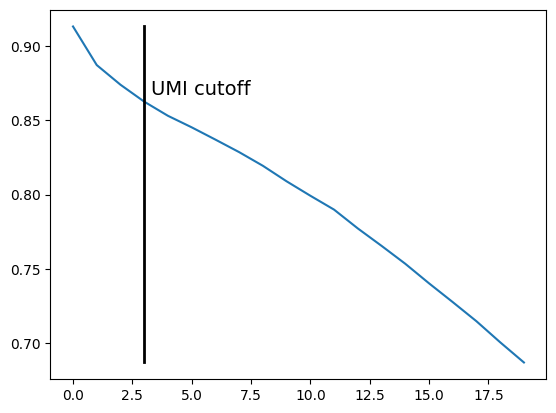

In [17]:
cell_data = {}
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        cell_data[(sample,cell_bc)] = {}

for sample,cell_bc,umi,larry_bc in counts_filtered.keys():
    if (sample,cell_bc) in cell_data:
        if not larry_bc in cell_data[(sample,cell_bc)]:
            cell_data[(sample,cell_bc)][larry_bc] = 0
        cell_data[(sample,cell_bc)][larry_bc] += 1

num_cells_with_barcode = np.zeros(20)
for larry_bc_counts in cell_data.values():
    if len(larry_bc_counts)>0:
        num_cells_with_barcode[:np.min([20,np.max(list(larry_bc_counts.values()))])] += 1
efficiency = num_cells_with_barcode / len(cell_data)
plt.plot(range(20),efficiency)
plt.plot([N_UMIS,N_UMIS],[np.min(efficiency),np.max(efficiency)],'-k',linewidth=2)
plt.text(N_UMIS*1.1,np.max(efficiency)*.95,'UMI cutoff',fontsize=14)

final_BCs = {}
for k,larry_bc_counts in cell_data.items():
    final_BCs[k] = '-'.join(sorted([k for k,v in larry_bc_counts.items() if v >= N_UMIS]))
print('\nFinal annotation has '+repr(len(set(final_BCs.values())))+' clones in '+repr(len([k for k,v in final_BCs.items() if len(v)>0]))+' cells')

In [18]:
output = []
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        output.append(sample+','+cell_bc+','+final_BCs[(sample,cell_bc)])
open(output_prefix+'-250123.csv','w').write('\n'.join(output))

906666

In [9]:
larry_prefix = 'GTTGCTAGGAGAGACCATATG'
N_READS = 10
N_UMIS = 3
N_HAMMING = 3

output_prefix = 'Larry_day-12'

sample_paths = {
    'Larry_day-12': {
        'filtered_cell_barcodes_path':
        '/mnt/yiming/nfs_share/larry/Larry-D12/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',
        'larry_barcode_fastq_paths':[
            '/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz',
            '/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_2.fq.gz'
        ]
    }
}

In [3]:
counts = {}

for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open('/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz')
        R2 = gzip.open('/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_2.fq.gz')
        counter = 0
        start_time = time.time()
        while True:
            counter += 1
            if counter % 1000000 == 0: print(fastq_path+ ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '': break
            if r2_line[0] in '@+': continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16]+'-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) and in_filtered_list(cell_bc, filtered_cell_barcodes):
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1

/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz: Processed 1000000 lines in 19.806400537490845 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz: Processed 2000000 lines in 39.74628782272339 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz: Processed 3000000 lines in 59.97742176055908 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz: Processed 4000000 lines in 80.41882228851318 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz: Processed 5000000 lines in 100.71715688705444 seconds
/mnt/yiming/nfs_share/larry/barcode-preprocess-d12/raw_data/Larry4_FKDL240216857-1A_22JGC2LT4_L6_1.fq.gz: Processed 6000000 lines in 119.6060152053833 seconds
/mnt/yiming/nfs_share/larry/barcode-preproce

KeyboardInterrupt: 

In [4]:
counts

{('Larry_day-12',
  'GNAGATGTCCGCACGA-1',
  'TCCGGGAT',
  'TAAATGAGTGCAACCTACTCACGAAAGAGTTTTAAGAATA'): 1,
 ('Larry_day-12',
  'GNAATGCAGGATACAT-1',
  'TGGCCGGT',
  'ATGGTGCAAACAACTAACGAAAGATATCGTATTTAGATTT'): 1,
 ('Larry_day-12',
  'TNAATCGCAAGAATGT-1',
  'TCCGTGGC',
  'CGCCTGAATTCAGCGAACTGCCGAAAGAGTTAACAGTCAG'): 1,
 ('Larry_day-12',
  'CNTCTCCGTACGGATG-1',
  'CATTACTG',
  'TCATTGTAAGCAAACGACGGACGACCAAGTACCTAGGGAA'): 1,
 ('Larry_day-12',
  'CNCTCAGGTTGGGTTT-1',
  'GCAAAATA',
  'CATCTGCCTACACACTACTGCCGACAACGTCTCAAGTCAA'): 1,
 ('Larry_day-12',
  'CNACAGCTCGAAGGAC-1',
  'AGTCGATA',
  'TAGTTGCAGCCACGACACAAGAGAGGATGTTACCAGAGCA'): 1,
 ('Larry_day-12',
  'TNGCACTGTACTGCGC-1',
  'GAAGAAGT',
  'GCAATGGGTGCATGCAACACCGGACTCTGTCCCTAGCGGA'): 1,
 ('Larry_day-12',
  'CNGTGAAGTTGTTTGG-1',
  'AAGACTGA',
  'AATGTGGCACCATTCAACGAGCGATGTAGTATCCAGACTT'): 1,
 ('Larry_day-12',
  'TNGGGACTCGATTGGT-1',
  'TGAACTTG',
  'CAGATGCCAGCACTCCACGACGGACTCGGTACCCAGGCCG'): 1,
 ('Larry_day-12',
  'TNCCAATTCAACTGGT-1',
  'G

In [5]:
len(counts)

1445117

In [2]:
# Load the object from the file
with open('Larry_day12_barcode.pkl', 'rb') as file:
    counts = pickle.load(file)

In [3]:
counts

{('Larry_day-12',
  'GNAGATGTCCGCACGA-1',
  'TCCGGGAT',
  'TAAATGAGTGCAACCTACTCACGAAAGAGTTTTAAGAATA'): 2,
 ('Larry_day-12',
  'GNAATGCAGGATACAT-1',
  'TGGCCGGT',
  'ATGGTGCAAACAACTAACGAAAGATATCGTATTTAGATTT'): 2,
 ('Larry_day-12',
  'TNAATCGCAAGAATGT-1',
  'TCCGTGGC',
  'CGCCTGAATTCAGCGAACTGCCGAAAGAGTTAACAGTCAG'): 2,
 ('Larry_day-12',
  'CNTCTCCGTACGGATG-1',
  'CATTACTG',
  'TCATTGTAAGCAAACGACGGACGACCAAGTACCTAGGGAA'): 2,
 ('Larry_day-12',
  'CNCTCAGGTTGGGTTT-1',
  'GCAAAATA',
  'CATCTGCCTACACACTACTGCCGACAACGTCTCAAGTCAA'): 2,
 ('Larry_day-12',
  'CNACAGCTCGAAGGAC-1',
  'AGTCGATA',
  'TAGTTGCAGCCACGACACAAGAGAGGATGTTACCAGAGCA'): 2,
 ('Larry_day-12',
  'TNGCACTGTACTGCGC-1',
  'GAAGAAGT',
  'GCAATGGGTGCATGCAACACCGGACTCTGTCCCTAGCGGA'): 2,
 ('Larry_day-12',
  'CNGTGAAGTTGTTTGG-1',
  'AAGACTGA',
  'AATGTGGCACCATTCAACGAGCGATGTAGTATCCAGACTT'): 2,
 ('Larry_day-12',
  'TNGGGACTCGATTGGT-1',
  'TGAACTTG',
  'CAGATGCCAGCACTCCACGACGGACTCGGTACCCAGGCCG'): 2,
 ('Larry_day-12',
  'TNCCAATTCAACTGGT-1',
  'G

In [11]:
len(counts)

9466707

In [16]:
N_READS = 30
N_UMIS = 3
N_HAMMING = 3

Retaining 723 out of 9466707 (Sample,Cell-BC,UMI,GFP-BC) combinations


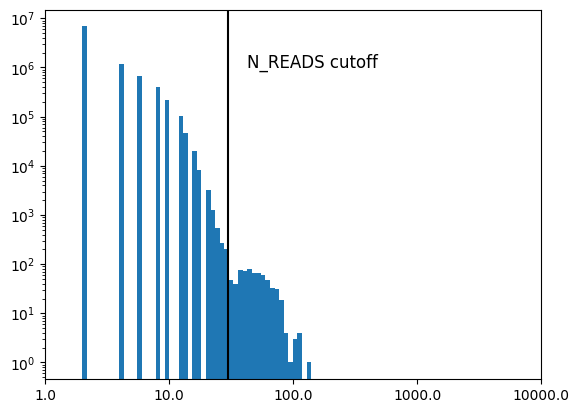

In [17]:
num_reads = [v for k,v in counts.items()]
plt.hist(np.log(num_reads)/np.log(10), bins=50)
plt.axvline(np.log(N_READS)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(N_READS)/np.log(10)*1.1,10**6,'N_READS cutoff', fontsize=12)
plt.yscale('log')

counts_filtered = {k:v for k,v in counts.items() if v >= N_READS}
print('Retaining '+repr(len(counts_filtered))+ ' out of '+repr(len(counts))+' (Sample,Cell-BC,UMI,GFP-BC) combinations')

In [18]:
def hamming(bc1,bc2): return np.sum([x1 != x2 for x1,x2 in zip(bc1,bc2)])

all_gfp_bcs = sorted(set([k[3] for k in counts_filtered]))
good_gfp_bcs = []
bc_map = {}
for i,bc1 in enumerate(all_gfp_bcs):
    if i > 0 and i % 500 == 0: print('Mapped '+repr(i)+' out of '+repr(len(all_gfp_bcs))+' barcodes')
    mapped = False
    for bc2 in good_gfp_bcs:
        if hamming(bc1,bc2) <= N_HAMMING:
            mapped = True
            bc_map[bc1] = bc2
            break
    if not mapped:
        good_gfp_bcs.append(bc1)

print('\nCollapsed '+repr(len(bc_map))+' barcodes')
for bc in good_gfp_bcs: bc_map[bc] = bc


Collapsed 27 barcodes



Final annotation has 6 clones in 7 cells


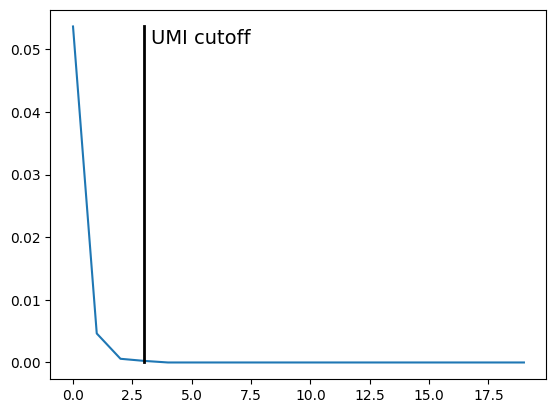

In [19]:
cell_data = {}
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        cell_data[(sample,cell_bc)] = {}

for sample,cell_bc,umi,larry_bc in counts_filtered.keys():
    if (sample,cell_bc) in cell_data:
        if not larry_bc in cell_data[(sample,cell_bc)]:
            cell_data[(sample,cell_bc)][larry_bc] = 0
        cell_data[(sample,cell_bc)][larry_bc] += 1

num_cells_with_barcode = np.zeros(20)
for larry_bc_counts in cell_data.values():
    if len(larry_bc_counts)>0:
        num_cells_with_barcode[:np.min([20,np.max(list(larry_bc_counts.values()))])] += 1
efficiency = num_cells_with_barcode / len(cell_data)
plt.plot(range(20),efficiency)
plt.plot([N_UMIS,N_UMIS],[np.min(efficiency),np.max(efficiency)],'-k',linewidth=2)
plt.text(N_UMIS*1.1,np.max(efficiency)*.95,'UMI cutoff',fontsize=14)

final_BCs = {}
for k,larry_bc_counts in cell_data.items():
    final_BCs[k] = '-'.join(sorted([k for k,v in larry_bc_counts.items() if v >= N_UMIS]))
print('\nFinal annotation has '+repr(len(set(final_BCs.values())))+' clones in '+repr(len([k for k,v in final_BCs.items() if len(v)>0]))+' cells')

In [17]:
output = []
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        output.append(sample+','+cell_bc+','+final_BCs[(sample,cell_bc)])
open(output_prefix+'.larry_d4_clones-240930.csv','w').write('\n'.join(output))

457437

In [26]:
import gzip, time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle

def is_valid(bc):
    return (bc[4:6]=='TG'
            and bc[10:12]=='CA' 
            and bc[16:18]=='AC' 
            and bc[22:24]=='GA' 
            and bc[28:30]=='GT'
            and bc[34:36]=='AG')

def in_filtered_list(cell_bc, filtered_cell_barcodes):
    num_Ns = sum([c=='N' for c in cell_bc])
    if num_Ns > 1: return False
    elif num_Ns == 1: return np.any([cell_bc.replace('N',c) in filtered_cell_barcodes for c in 'ACTG'])
    else: return cell_bc in filtered_cell_barcodes

In [27]:
# testing data, without CBC
larry_prefix = 'GTTGCTAGGAGAGACCATATG'

N_READS = 10
N_UMIS = 3
N_HAMMING = 3

output_prefix = 'test'

sample_paths = {
    'test': {
        'larry_barcode_fastq_paths':[
            '/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_1_small.fq.gz',
            '/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_2_small.fq.gz'
        ]
    }
}

counts = {}

for sample,paths in sample_paths.items():
    # filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    # filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open('/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_1_small.fq.gz')
        R2 = gzip.open('/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_2_small.fq.gz')
        counter = 0
        start_time = time.time()
        while True:
            counter += 1
            if counter % 1000000 == 0: print(fastq_path+ ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '': break
            if r2_line[0] in '@+': continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16]+'-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) :
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1

with open('test_barcode.pkl', 'wb') as file:
    pickle.dump(counts, file)

In [28]:
len(counts)

930

# pipeline without CBC, 4 cores

In [19]:
import gzip, time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
from multiprocessing import Pool

def is_valid(bc):
    return (bc[4:6]=='TG'
            and bc[10:12]=='CA' 
            and bc[16:18]=='AC' 
            and bc[22:24]=='GA' 
            and bc[28:30]=='GT'
            and bc[34:36]=='AG')

def in_filtered_list(cell_bc, filtered_cell_barcodes):
    num_Ns = sum([c=='N' for c in cell_bc])
    if num_Ns > 1: return False
    elif num_Ns == 1: return np.any([cell_bc.replace('N',c) in filtered_cell_barcodes for c in 'ACTG'])
    else: return cell_bc in filtered_cell_barcodes

# testing data, without CBC
larry_prefix = 'GTTGCTAGGAGAGACCATATG'

N_READS = 10
N_UMIS = 3
N_HAMMING = 3

output_prefix = 'test'

sample_paths = {
    'test': {
        'larry_barcode_fastq_paths':[
            '/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_1_small.fq.gz',
            '/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_2_small.fq.gz'
        ]
    }
}

# sample_paths = {
#     'test': {
#         'larry_barcode_fastq_paths':[
#             '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/subset_larry-amplicon_1.fastq.gz',
#             '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/subset_larry-amplicon_2.fastq.gz'
#         ]
#     }
# }

counts = {}
sample = 'test'

# Define a function to process a single fastq file
def process_fastq_file(fastq_path):
    R1 = gzip.open(fastq_path[0])
    R2 = gzip.open(fastq_path[1])
    counter = 0
    start_time = time.time()
    while True:
        counter += 1
        if counter % 1000000 == 0:
            # print(fastq_path + ': Processed {} lines in {} seconds'.format(counter, time.time() - start_time))
            print('{}: Processed {} lines in {} seconds'.format(fastq_path, counter, time.time() - start_time))
        try:
            r1_line = R1.readline().decode('utf-8')
            r2_line = R2.readline().decode('utf-8')
        except:
            print('ERROR extracting {}'.format(fastq_path))
            break
        if r2_line == '':
            break
        if r2_line[0] in '@+':
            continue
        if larry_prefix in r2_line:
            larry_bc = r2_line.split(larry_prefix)[1][:40]
            cell_bc = r1_line[:16] + '-1'
            umi = r1_line[16:24]
            if is_valid(larry_bc):
                combo = (sample, cell_bc, umi, larry_bc)
                if combo in counts:
                    counts[combo] += 1
                else:
                    counts[combo] = 1

# Define a function for multiprocessing
def process_fastq_files(paths):
    with Pool(processes=4) as pool:  # You can adjust the number of processes based on your system
        pool.map(process_fastq_file, paths)

# Create a list of fastq file paths to process
fastq_paths = [(paths['larry_barcode_fastq_paths'][0], paths['larry_barcode_fastq_paths'][1]) for paths in sample_paths.values()]

# Run the processing using multiprocessing
process_fastq_files(fastq_paths)

with open('test_barcode-v4.pkl', 'wb') as file:
    pickle.dump(counts, file)

In [24]:
# Load the object from the file
with open('test_barcode-v2.pkl', 'rb') as file:
    bar_m = pickle.load(file)

In [25]:
bar_m

{}

In [7]:
import gzip
import time
import numpy as np
from collections import defaultdict
import pickle
from multiprocessing import Pool

# Define your functions here

def is_valid(bc):
    return (bc[4:6] == 'TG'
            and bc[10:12] == 'CA'
            and bc[16:18] == 'AC'
            and bc[22:24] == 'GA'
            and bc[28:30] == 'GT'
            and bc[34:36] == 'AG')

def in_filtered_list(cell_bc, filtered_cell_barcodes):
    num_Ns = sum([c == 'N' for c in cell_bc])
    if num_Ns > 1:
        return False
    elif num_Ns == 1:
        return np.any([cell_bc.replace('N', c) in filtered_cell_barcodes for c in 'ACTG'])
    else:
        return cell_bc in filtered_cell_barcodes

larry_prefix = 'GTTGCTAGGAGAGACCATATG'
N_READS = 10
N_UMIS = 3
N_HAMMING = 3
output_prefix = 'Larry_day-4'

sample_paths = {
    'Larry_day-4': {
        'filtered_cell_barcodes_path': '/mnt/yiming/nfs_share/larry/Larry-D4/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',
        'larry_barcode_fastq_paths': [
            '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/subset_larry-amplicon_1.fastq.gz',
            '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/subset_larry-amplicon_2.fastq.gz'
        ]
    }
}

counts = defaultdict(int)

# Function to process a single file
def process_file(fastq_path):
    results = []
    # Your existing file processing code here
    # For example, you might update the 'counts' dictionary
    # counts['example_key'] += 1
    return results

def process_sample(sample_paths):
    for fastq_path in sample_paths:
        results = process_file(fastq_path)
        # Aggregate results here if needed
        # For example, counts['example_key'] += len(results)

if __name__ == '__main__':
    num_processes = 4  # Number of processes to run in parallel
    pool = Pool(processes=num_processes)  # Create a process pool

    # Map the process_sample function to the process pool for parallel execution
    pool.map(process_sample, [paths['larry_barcode_fastq_paths'] for paths in sample_paths.values()])

    pool.close()
    pool.join()

    # Your existing code for saving the results
    with open('Larry_day4_barcode.pkl', 'wb') as file:
        pickle.dump(counts, file)

In [8]:
# Load the object from the file
with open('Larry_day4_barcode.pkl', 'rb') as file:
    bar_m = pickle.load(file)

In [9]:
bar_m

defaultdict(int, {})

In [4]:
R1 = gzip.open('/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_1_1mln.fq')

In [6]:
R1.readline().decode('utf-8')

BadGzipFile: Not a gzipped file (b'@A')

In [5]:
larry_prefix = 'GTTGCTAGGAGAGACCATATG'

N_READS = 10
N_UMIS = 3
N_HAMMING = 3

output_prefix = 'Larry_day-4'

sample_paths = {
    'Larry_day-4': {
        'filtered_cell_barcodes_path':'/mnt/yiming/nfs_share/larry/Larry-D4/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',
        'larry_barcode_fastq_paths':[
            '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz',
            '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_2.fastq.gz'
        ]
    }
}

# read1 = '/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_1_1mln.fq'
# read2 = '/home/yiming/larry/cbutools/tests/data/SLX-22398.SITTA1.s_1.r_2_1mln.fq'

In [ ]:
counts = {}

for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open('/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz')
        R2 = gzip.open('/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_2.fastq.gz')
        counter = 0
        start_time = time.time()
        while True:
            counter += 1
            if counter % 1000000 == 0: print(fastq_path+ ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '': break
            if r2_line[0] in '@+': continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16]+'-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) and in_filtered_list(cell_bc, filtered_cell_barcodes):
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1

/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 1000000 lines in 11.523212671279907 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 2000000 lines in 23.21749711036682 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 3000000 lines in 34.499983072280884 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 4000000 lines in 45.63020873069763 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 5000000 lines in 57.040706396102905 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 6000000 lines in 68.58197355270386 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 7000000 lines in 80.38437223434448 seconds
/mnt/yimin

In [4]:
counts

{('Larry_day-4',
  'CATGAGTTCACTACTT-1',
  'GAATGAGC',
  'CCGGTGTCAACAACGAACACCCGATAGCGTGCTTAGTCTC'): 2,
 ('Larry_day-4',
  'GACAGCCAGATTCGCT-1',
  'TAGTGTTC',
  'TCGCTGTCATCAAGTCACTTCGGAAAGCGTCTACAGTACA'): 1,
 ('Larry_day-4',
  'TGTGGCGTCAAGGCTT-1',
  'TTAAATCG',
  'TACCTGTGACCACCGTACGGTTGATACGGTAAGCAGAATG'): 1,
 ('Larry_day-4',
  'TGCATGAAGAGAGCCT-1',
  'TGGTACAT',
  'AAGCTGTCTGCAAGCCACCTCCGATTGAGTCGTCAGTGCT'): 2,
 ('Larry_day-4',
  'CTAAGTGTCGAAACAA-1',
  'ACCGGCGG',
  'ATCTTGAAGTCATGTAACCTCTGAGTGAGTACCAAGGTCG'): 1,
 ('Larry_day-4',
  'TTCCTAAAGAGCCATG-1',
  'CACACCTG',
  'GACGTGTTAACAACCCACTCACGATGCTGTCTGGAGATCC'): 2,
 ('Larry_day-4',
  'TATACCTCAAGCGGAT-1',
  'CTTCTGTA',
  'TGATTGACTACATAAAACACGGGAAATAGTTATAAGCATT'): 3,
 ('Larry_day-4',
  'CAGTGCGAGATGTAGT-1',
  'AAATTGCA',
  'CAAGTGCTTGCAGCACACCGTTGAGCTCGTAAGGAGGAGA'): 2,
 ('Larry_day-4',
  'ACTATGGTCGAACACT-1',
  'AAGACGCC',
  'TAAGTGCAGACAAGCAACGGCCGAGAACGTGTCAAGCCTG'): 2,
 ('Larry_day-4',
  'ATCGTGAGTCCGGTGT-1',
  'ATTAAAAG',


In [39]:
counts = {}

for sample, paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open('/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz')
        R2 = gzip.open('/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_2.fastq.gz')
        counter = 0
        start_time = time.time()
        lines_to_extract = 10  # Number of lines to extract from R2
        extracted_lines = 0

        while extracted_lines < lines_to_extract:
            counter += 1
            if counter % 1000000 == 0:
                print(fastq_path + ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '':
                break
            if r2_line[0] in '@+':
                continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16] + '-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) and in_filtered_list(cell_bc, filtered_cell_barcodes):
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1
                    extracted_lines += 1

In [44]:
counts = {}

for sample, paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open('/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz')
        R2 = gzip.open('/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_2.fastq.gz')
        counter = 0
        start_time = time.time()
        lines_to_extract = 100  # Number of lines to extract from R2
        extracted_lines = 0

        while extracted_lines < lines_to_extract:
            counter += 1
            if counter % 1000000 == 0:
                print(fastq_path + ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '':
                break
            if r2_line[0] in '@+':
                continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16] + '-1'
                umi = r1_line[16:24]
                combo = (sample, cell_bc, umi, larry_bc)
                if combo in counts:
                    counts[combo] += 1
                else:
                    counts[combo] = 1
                extracted_lines += 1

In [45]:
counts

{('Larry_day-4',
  'CATGAGTTCACTACTT-1',
  'GAATGAGC',
  'CCGGTGTCAACAACGAACACCCGATAGCGTGCTTAGTCTC'): 2,
 ('Larry_day-4',
  'GACAGCCAGATTCGCT-1',
  'TAGTGTTC',
  'TCGCTGTCATCAAGTCACTTCGGAAAGCGTCTACAGTACA'): 2,
 ('Larry_day-4',
  'TGTGGCGTCAAGGCTT-1',
  'TTAAATCG',
  'TACCTGTGACCACCGTACGGTTGATACGGTAAGCAGAATG'): 2,
 ('Larry_day-4',
  'TGCATGAAGAGAGCCT-1',
  'TGGTACAT',
  'AAGCTGTCTGCAAGCCACCTCCGATTGAGTCGTCAGTGCT'): 2,
 ('Larry_day-4',
  'CTAAGTGTCGAAACAA-1',
  'ACCGGCGG',
  'ATCTTGAAGTCATGTAACCTCTGAGTGAGTACCAAGGTCG'): 2,
 ('Larry_day-4',
  'TTCCTAAAGAGCCATG-1',
  'CACACCTG',
  'GACGTGTTAACAACCCACTCACGATGCTGTCTGGAGATCC'): 2,
 ('Larry_day-4',
  'TATACCTCAAGCGGAT-1',
  'CTTCTGTA',
  'TGATTGACTACATAAAACACGGGAAATAGTTATAAGCATT'): 2,
 ('Larry_day-4',
  'CAGTGCGAGATGTAGT-1',
  'AAATTGCA',
  'CAAGTGCTTGCAGCACACCGTTGAGCTCGTAAGGAGGAGA'): 2,
 ('Larry_day-4',
  'ACTATGGTCGAACACT-1',
  'AAGACGCC',
  'TAAGTGCAGACAAGCAACGGCCGAGAACGTGTCAAGCCTG'): 2,
 ('Larry_day-4',
  'ATCGTGAGTCCGGTGT-1',
  'ATTAAAAG',


In [3]:
import gzip

# Input file name
input_file = '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz'

# Open the gzip file and read the contents
with gzip.open(input_file, 'rt') as f:
    # Read a certain number of lines for checking
    num_lines_to_read = 10  # Specify the number of lines you want to read

    # Read and print the first num_lines_to_read lines
    for _ in range(num_lines_to_read):
        line = f.readline().strip()
        print(line)

@A00549:399:HHJTKDSXC:3:1101:18475:1110 1:N:0:GTGGATCAAA+CAGGGTTGGC
CATGAGTTCACTACTTGAATGAGCGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAAATAAAAAATTTTTTTTTTTTTTAAAGGGGGGGGGGGGGCGGGCCCCGGCAAAGAAGGACAAGGGGGCGGGGGCAAAAAAAAAACAA
+
FFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFF:FFFFFFFFFFFFFFFFFFFFFF:,FFFFF,,:,F,:,FFFF,,F,:F,,F::,,,,,,,F,,,:,FFF:,,,,,,F:,F,,,:,,,,:,F,,,,,,F,,:FFF,,,,,,,F:FF:,,:
@A00549:399:HHJTKDSXC:3:1101:18620:1110 1:N:0:GTGGATCAAA+CAGGGTTGGC
GACAGCCAGATTCGCTTAGTGTTCCGTATTTTTTTTTTTTTTTTTTTTTTTTCGTTTCAAATTAAAAATTTTTTTATTAAATTAAAATGGGAGTGGCAACATACACGGTCAACGAAAGCACCGGGGAGGGGCAAAAAAAAAATGGATGGAA
+
FFFFFFFFFFFFFFF,FF,F,,F:F,FFFFFFFFFFFFFFFFFFFFFFFFFF,,,:,,FFF,FF,F,F,,FF,FF,:,,FF,,,,,,,F,F,:,,F:,,:,:,:,,F,,,:F,:::,,:,F,:FFF::FFF,:FF,,F:F:F,,,,,,,,,
@A00549:399:HHJTKDSXC:3:1101:19090:1110 1:N:0:GTGGATCAAA+CAGGGTTGGC
TGTGGCGTCAAGGCTTTTAAATCGGCAATTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGGTTTAAAATTAAAAAATTTTTTTTTTAAAGGAAAGGGGGGGTGGCACCACCCCGGGAAAGGAAAGGAAAGGGGGGGGGGAAAAAAAAAATT


In [3]:
import gzip

# Define the input file name
input_file = '/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz'

# Open the gzip file for reading
with gzip.open(input_file, 'rt') as f:
    line_num = 0

    # Loop through the file to read and print some lines from R2
    while line_num < 10:  # Specify the number of lines you want to read for checking
        r2_line = f.readline().strip()
        
        # # Check if the line belongs to R2
        # if r2_line.startswith('@'):  # Assuming '@' denotes the start of an R2 sequence
        print(r2_line)
        line_num += 1

@A00549:399:HHJTKDSXC:3:1101:18475:1110 1:N:0:GTGGATCAAA+CAGGGTTGGC
CATGAGTTCACTACTTGAATGAGCGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAAATAAAAAATTTTTTTTTTTTTTAAAGGGGGGGGGGGGGCGGGCCCCGGCAAAGAAGGACAAGGGGGCGGGGGCAAAAAAAAAACAA
+
FFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFF:FFFFFFFFFFFFFFFFFFFFFF:,FFFFF,,:,F,:,FFFF,,F,:F,,F::,,,,,,,F,,,:,FFF:,,,,,,F:,F,,,:,,,,:,F,,,,,,F,,:FFF,,,,,,,F:FF:,,:
@A00549:399:HHJTKDSXC:3:1101:18620:1110 1:N:0:GTGGATCAAA+CAGGGTTGGC
GACAGCCAGATTCGCTTAGTGTTCCGTATTTTTTTTTTTTTTTTTTTTTTTTCGTTTCAAATTAAAAATTTTTTTATTAAATTAAAATGGGAGTGGCAACATACACGGTCAACGAAAGCACCGGGGAGGGGCAAAAAAAAAATGGATGGAA
+
FFFFFFFFFFFFFFF,FF,F,,F:F,FFFFFFFFFFFFFFFFFFFFFFFFFF,,,:,,FFF,FF,F,F,,FF,FF,:,,FF,,,,,,,F,F,:,,F:,,:,:,:,,F,,,:F,:::,,:,F,:FFF::FFF,:FF,,F:F:F,,,,,,,,,
@A00549:399:HHJTKDSXC:3:1101:19090:1110 1:N:0:GTGGATCAAA+CAGGGTTGGC
TGTGGCGTCAAGGCTTTTAAATCGGCAATTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGGTTTAAAATTAAAAAATTTTTTTTTTAAAGGAAAGGGGGGGTGGCACCACCCCGGGAAAGGAAAGGAAAGGGGGGGGGGAAAAAAAAAATT


In [ ]:
counts = {}

for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open(fastq_path.format('R1'))
        R2 = gzip.open(fastq_path.format('R2'))
        counter = 0
        start_time = time.time()
        while True:
            counter += 1
            if counter % 1000000 == 0: print(fastq_path+ ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '': break
            if r2_line[0] in '@+': continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16]+'-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) and in_filtered_list(cell_bc, filtered_cell_barcodes):
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1

/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 1000000 lines in 2.013625383377075 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 2000000 lines in 4.026341915130615 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 3000000 lines in 6.0413818359375 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 4000000 lines in 8.056151390075684 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 5000000 lines in 10.070481300354004 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 6000000 lines in 12.085975408554077 seconds
/mnt/yiming/nfs_share/SugimuraRR_UCSO_CPOS-240606-RRS-23942a/larry-amplicon_1.fastq.gz: Processed 7000000 lines in 14.100986242294312 seconds
/mnt/yiming/

In [8]:
N_READS = 2
N_UMIS = 1
N_HAMMING = 1

Retaining 100 out of 100 (Sample,Cell-BC,UMI,GFP-BC) combinations


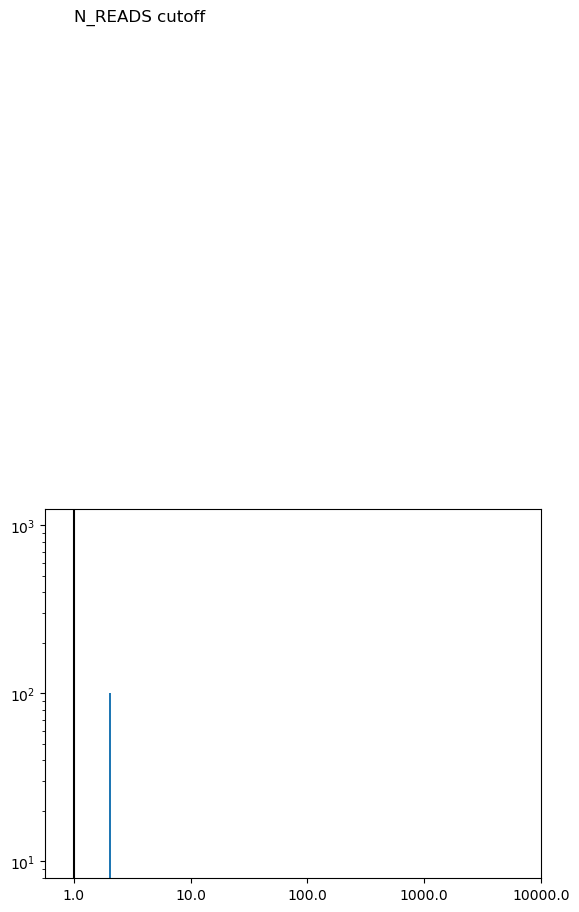

In [46]:
num_reads = [v for k,v in counts.items()]
plt.hist(np.log(num_reads)/np.log(10), bins=50)
plt.axvline(np.log(N_READS)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(N_READS)/np.log(10)*1.1,10**6,'N_READS cutoff', fontsize=12)
plt.yscale('log')

counts_filtered = {k:v for k,v in counts.items() if v >= N_READS}
print('Retaining '+repr(len(counts_filtered))+ ' out of '+repr(len(counts))+' (Sample,Cell-BC,UMI,GFP-BC) combinations')

In [41]:
def hamming(bc1,bc2): return np.sum([x1 != x2 for x1,x2 in zip(bc1,bc2)])

all_gfp_bcs = sorted(set([k[3] for k in counts_filtered]))
good_gfp_bcs = []
bc_map = {}
for i,bc1 in enumerate(all_gfp_bcs):
    if i > 0 and i % 500 == 0: print('Mapped '+repr(i)+' out of '+repr(len(all_gfp_bcs))+' barcodes')
    mapped = False
    for bc2 in good_gfp_bcs:
        if hamming(bc1,bc2) <= N_HAMMING:
            mapped = True
            bc_map[bc1] = bc2
            break
    if not mapped:
        good_gfp_bcs.append(bc1)

print('\nCollapsed '+repr(len(bc_map))+' barcodes')
for bc in good_gfp_bcs: bc_map[bc] = bc


Collapsed 0 barcodes



Final annotation has 1 clones in 0 cells


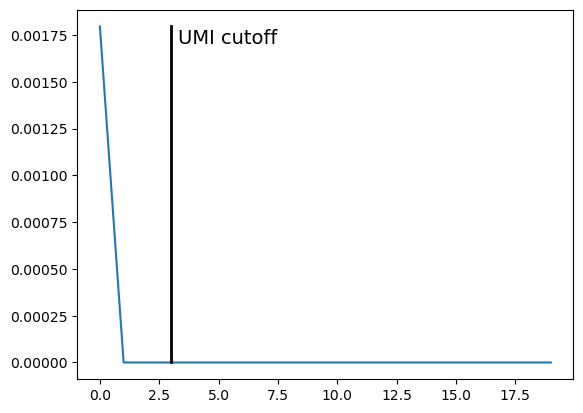

In [42]:
cell_data = {}
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        cell_data[(sample,cell_bc)] = {}

for sample,cell_bc,umi,larry_bc in counts_filtered.keys():
    if (sample,cell_bc) in cell_data:
        if not larry_bc in cell_data[(sample,cell_bc)]:
            cell_data[(sample,cell_bc)][larry_bc] = 0
        cell_data[(sample,cell_bc)][larry_bc] += 1

num_cells_with_barcode = np.zeros(20)
for larry_bc_counts in cell_data.values():
    if len(larry_bc_counts)>0:
        num_cells_with_barcode[:np.min([20,np.max(list(larry_bc_counts.values()))])] += 1
efficiency = num_cells_with_barcode / len(cell_data)
plt.plot(range(20),efficiency)
plt.plot([N_UMIS,N_UMIS],[np.min(efficiency),np.max(efficiency)],'-k',linewidth=2)
plt.text(N_UMIS*1.1,np.max(efficiency)*.95,'UMI cutoff',fontsize=14)

final_BCs = {}
for k,larry_bc_counts in cell_data.items():
    final_BCs[k] = '-'.join(sorted([k for k,v in larry_bc_counts.items() if v >= N_UMIS]))
print('\nFinal annotation has '+repr(len(set(final_BCs.values())))+' clones in '+repr(len([k for k,v in final_BCs.items() if len(v)>0]))+' cells')

In [43]:
output = []
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        output.append(sample+','+cell_bc+','+final_BCs[(sample,cell_bc)])
open(output_prefix+'.larry_clones.csv','w').write('\n'.join(output))

178125